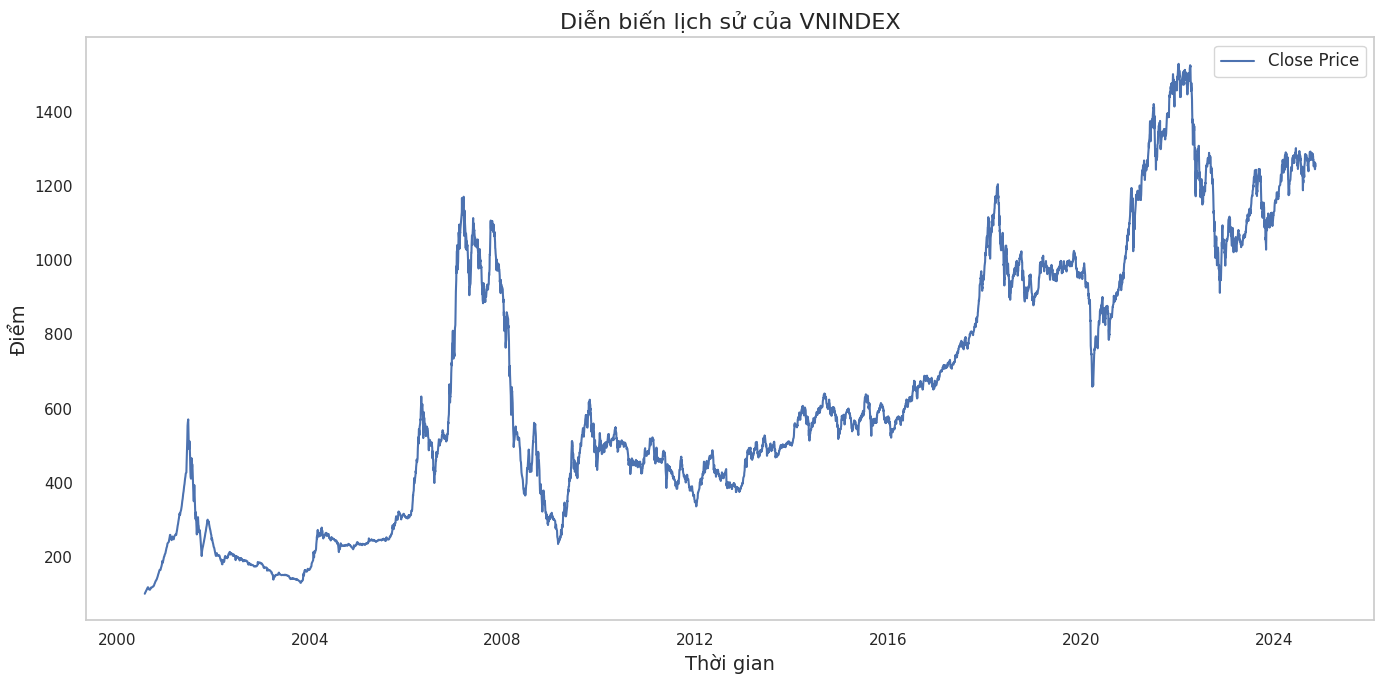

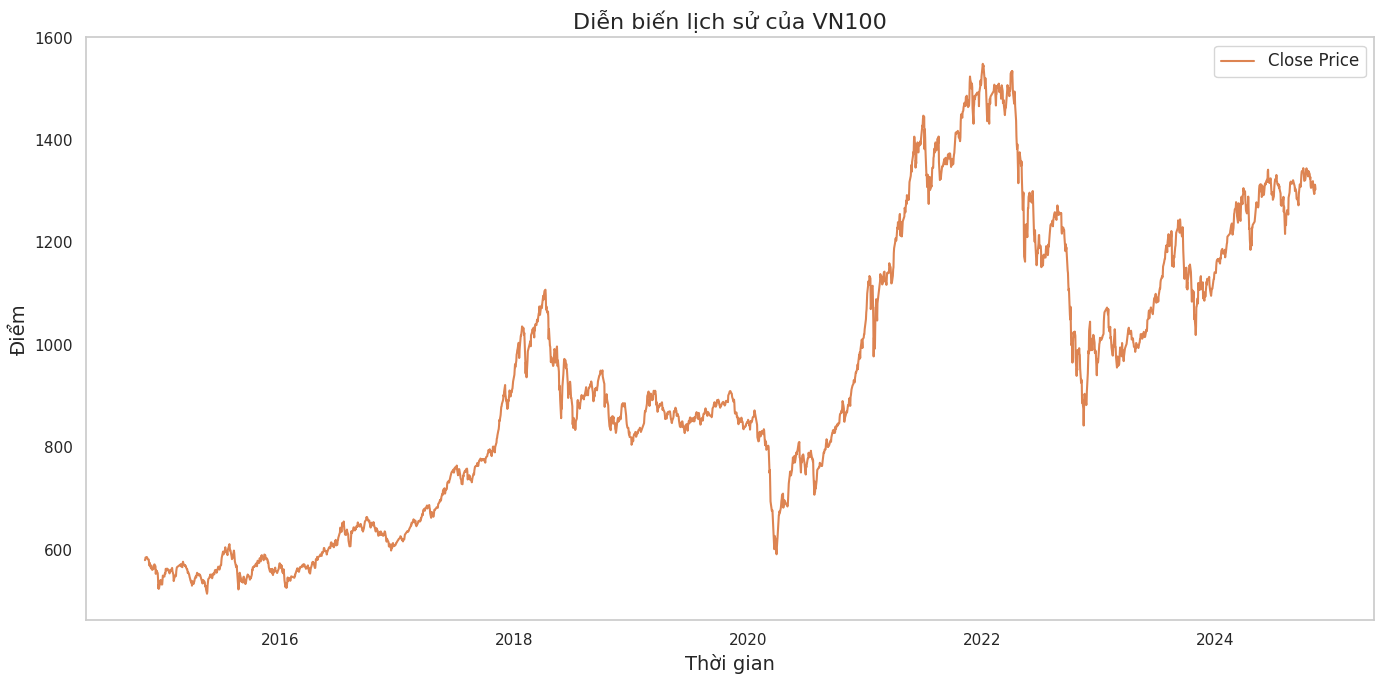

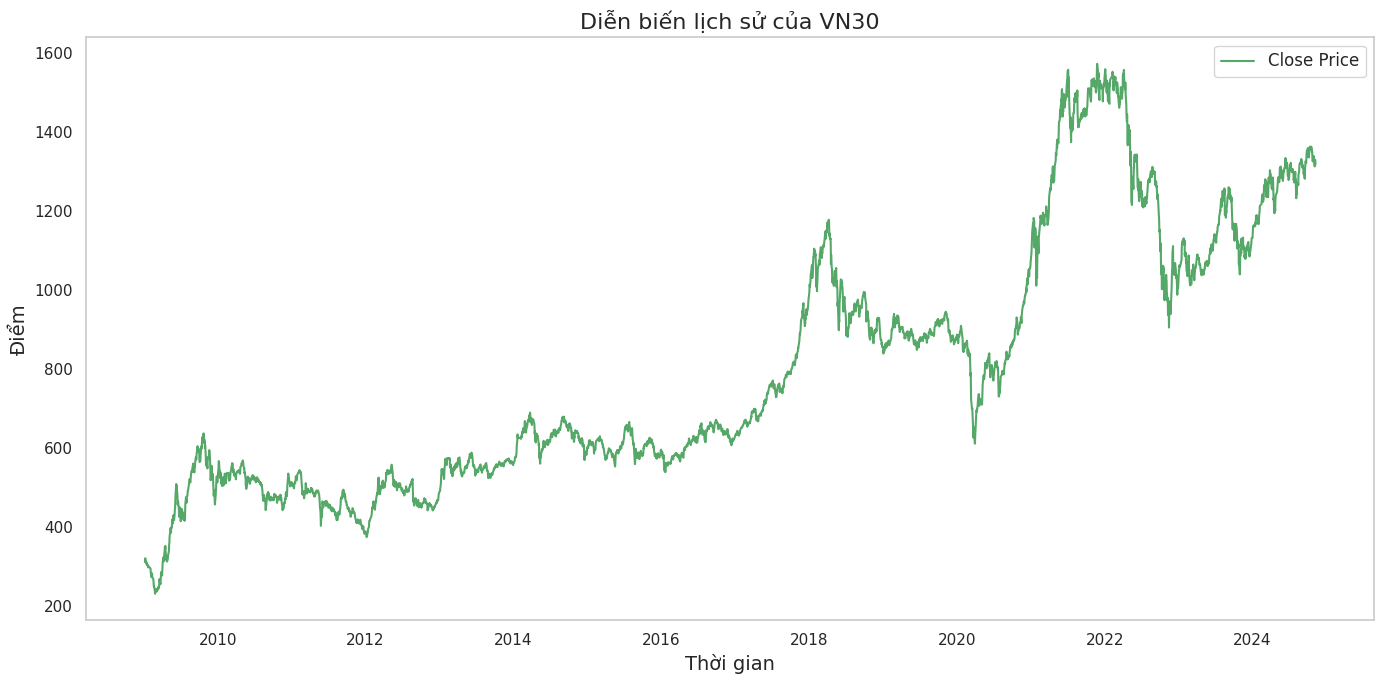

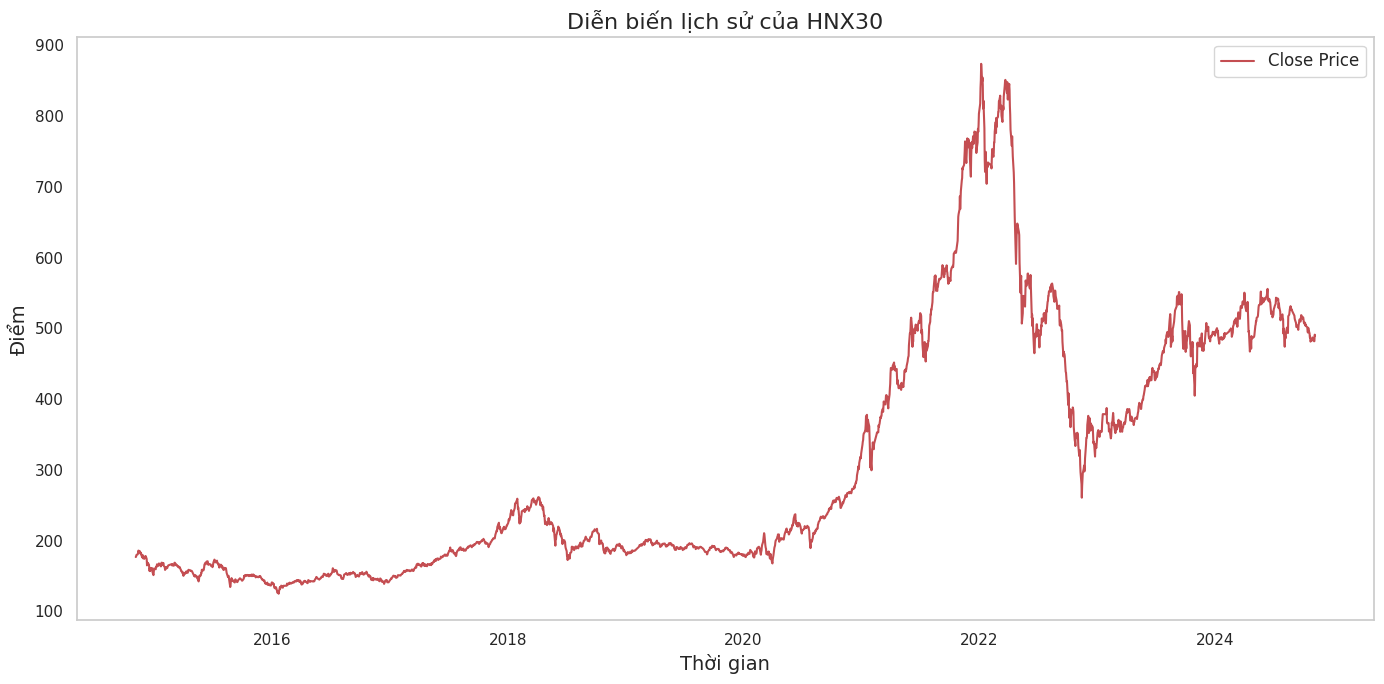

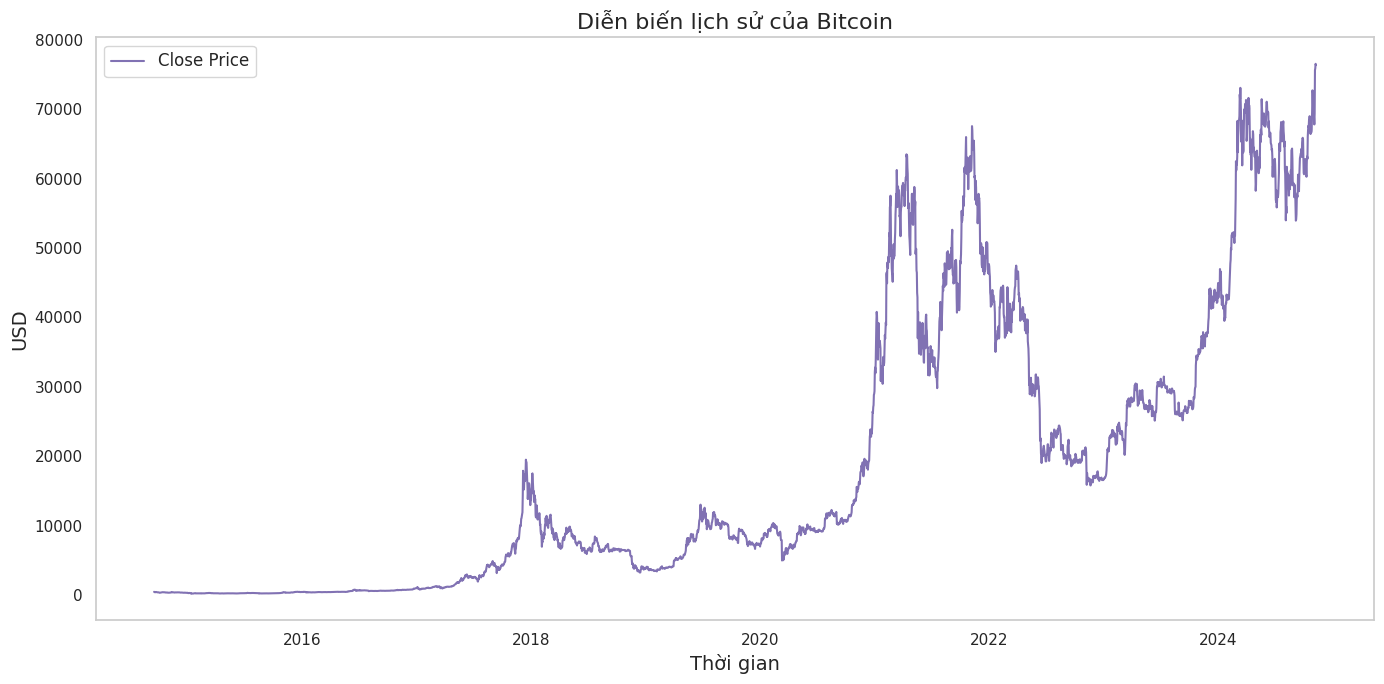

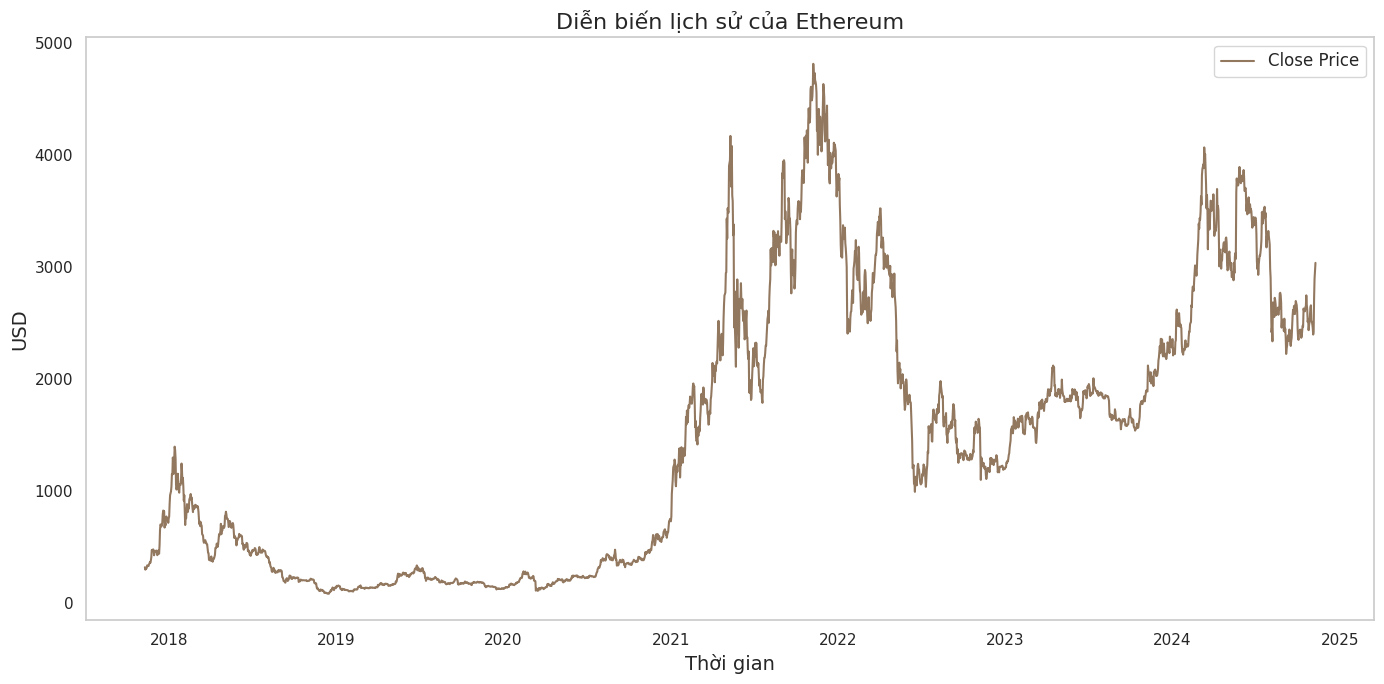

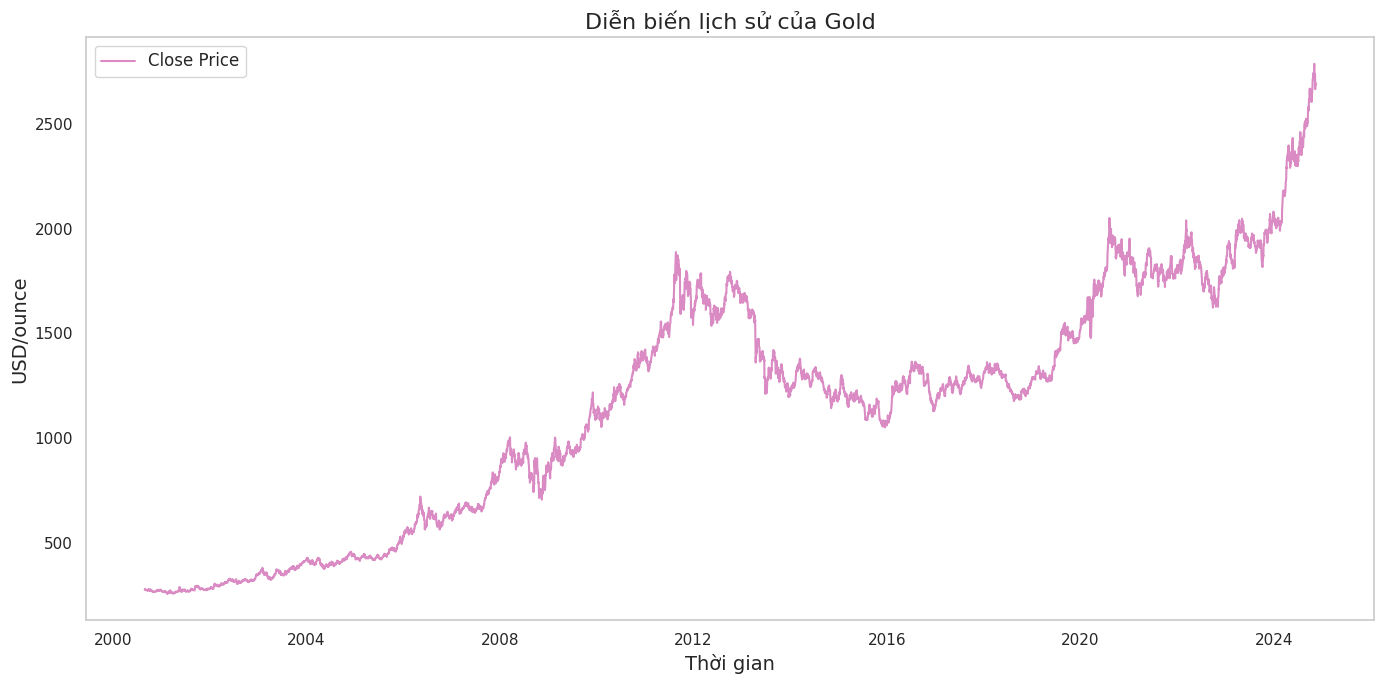

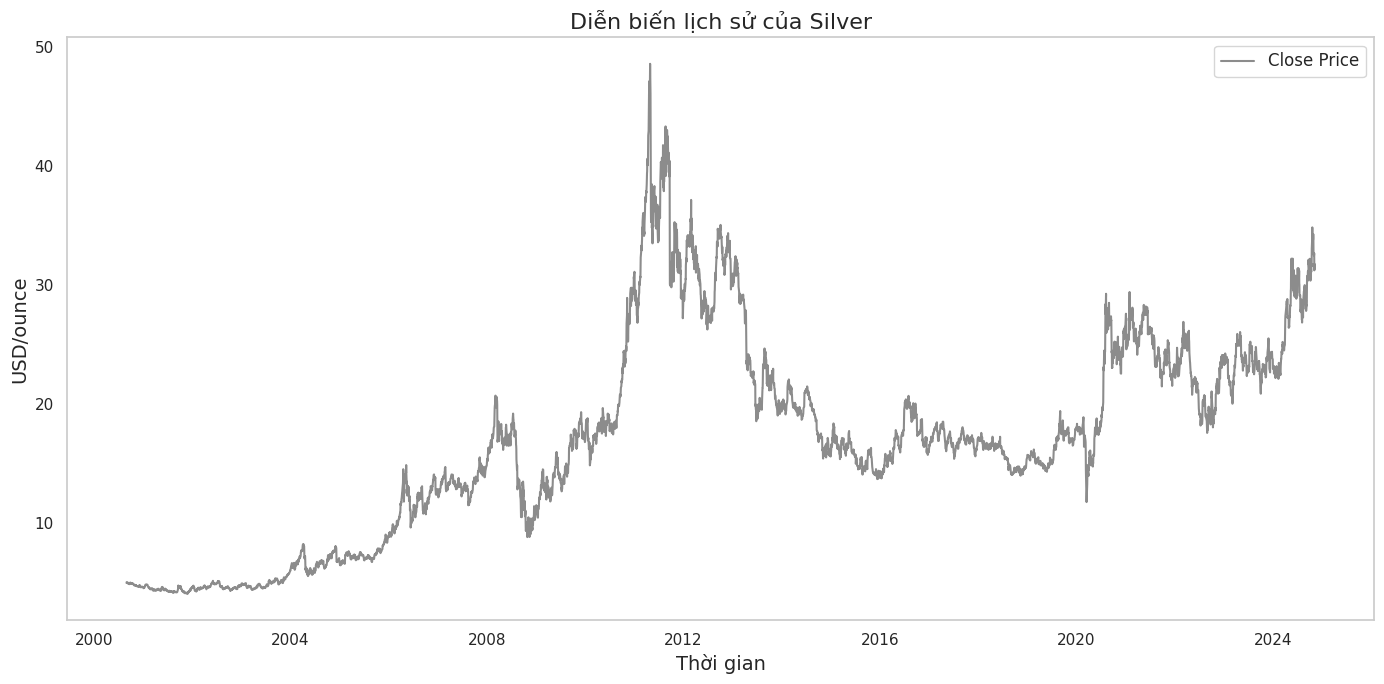

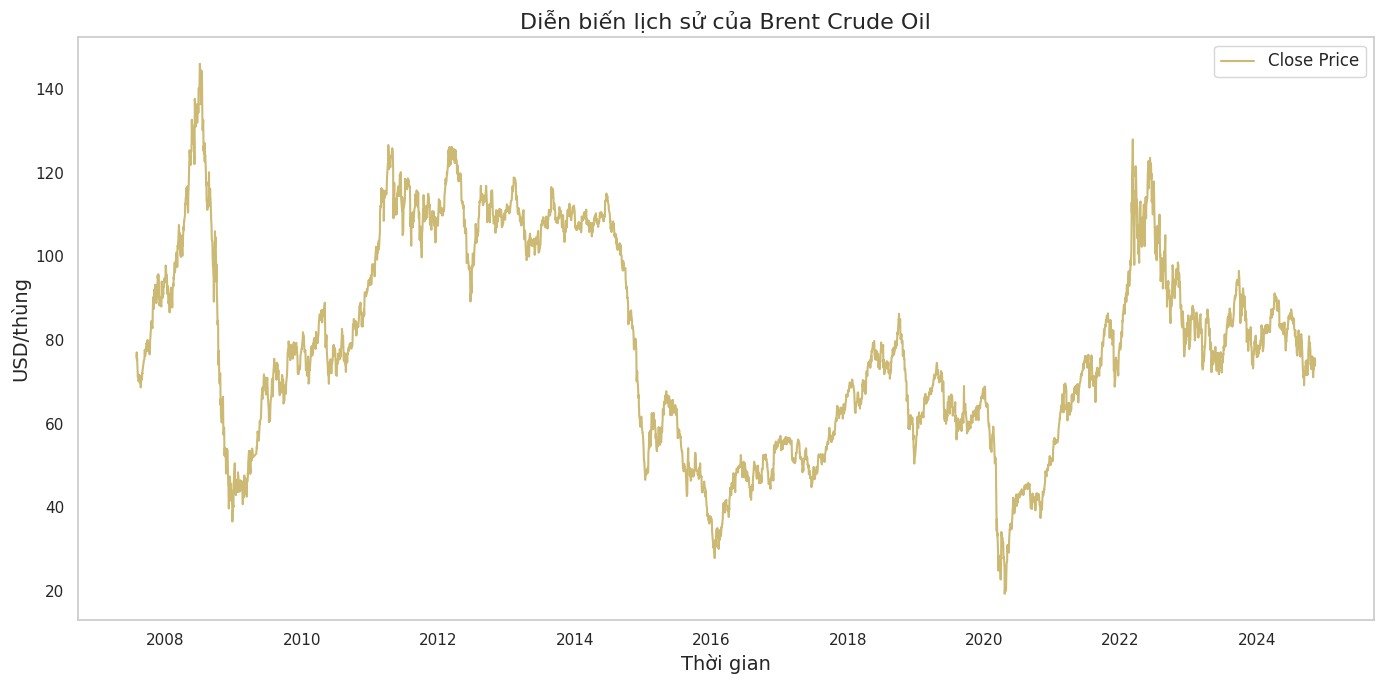

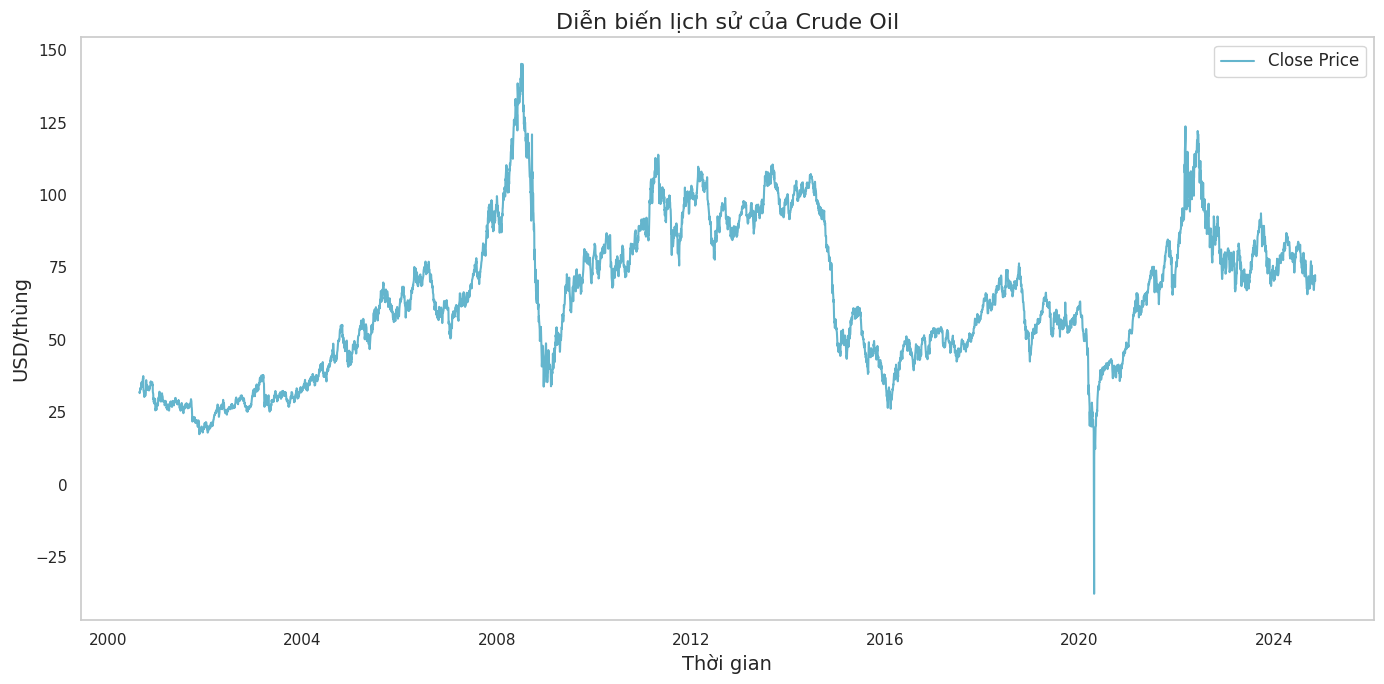

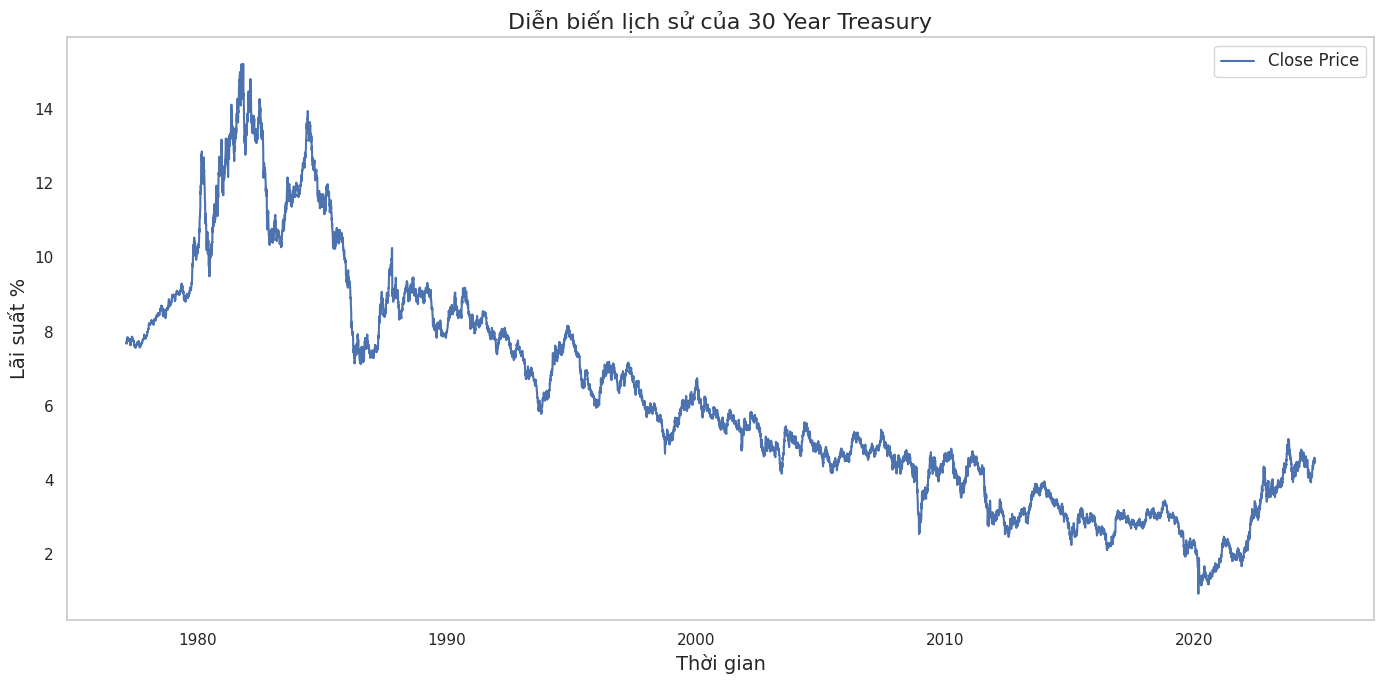

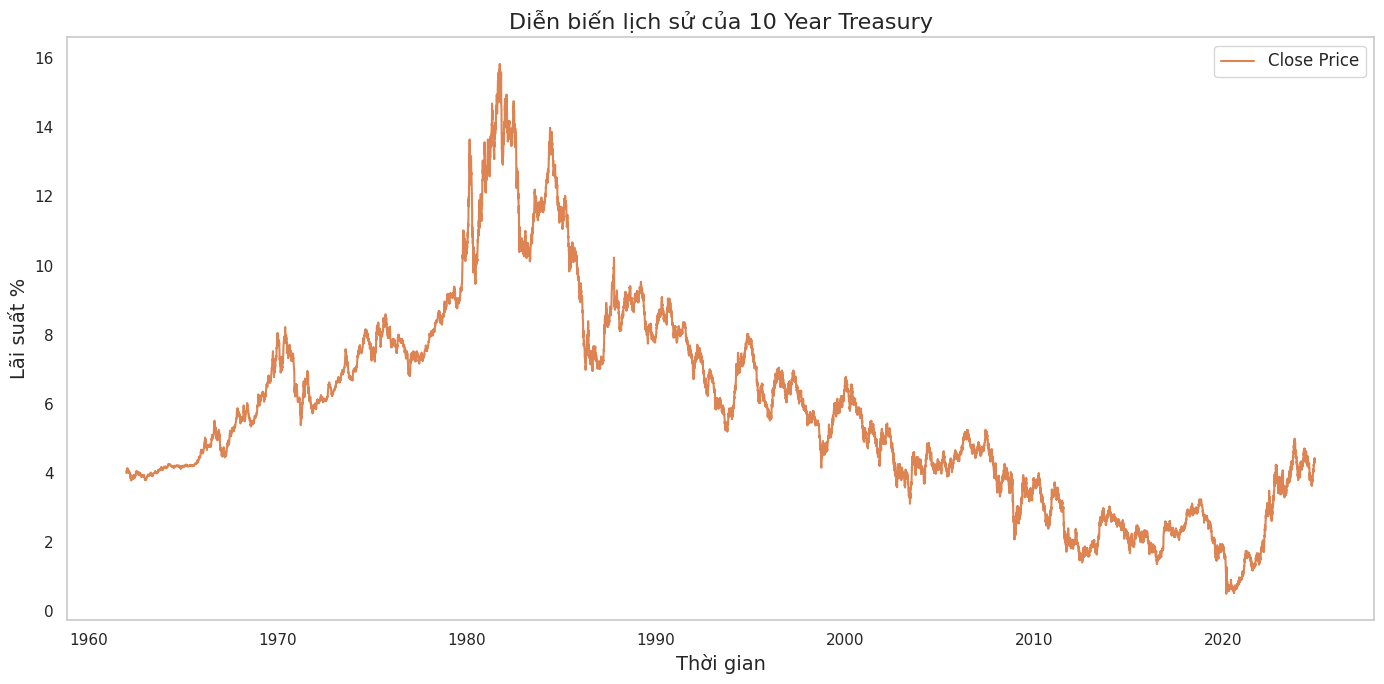

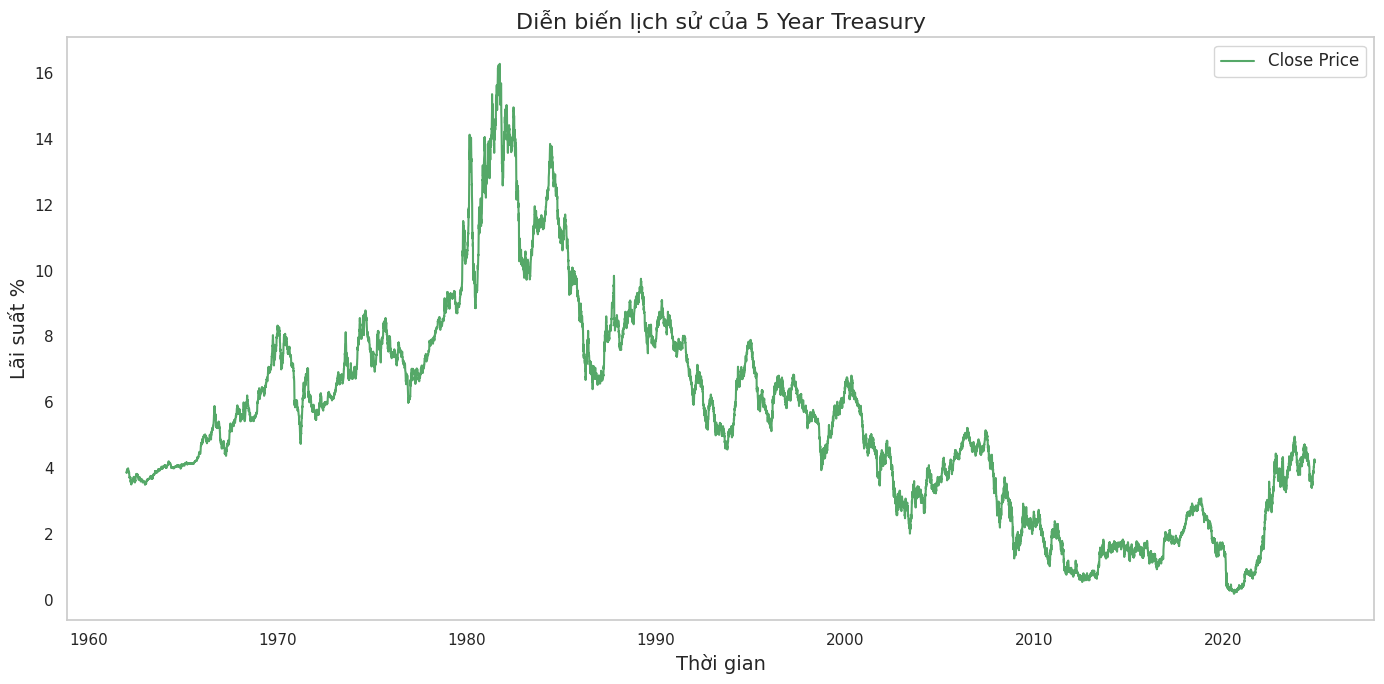

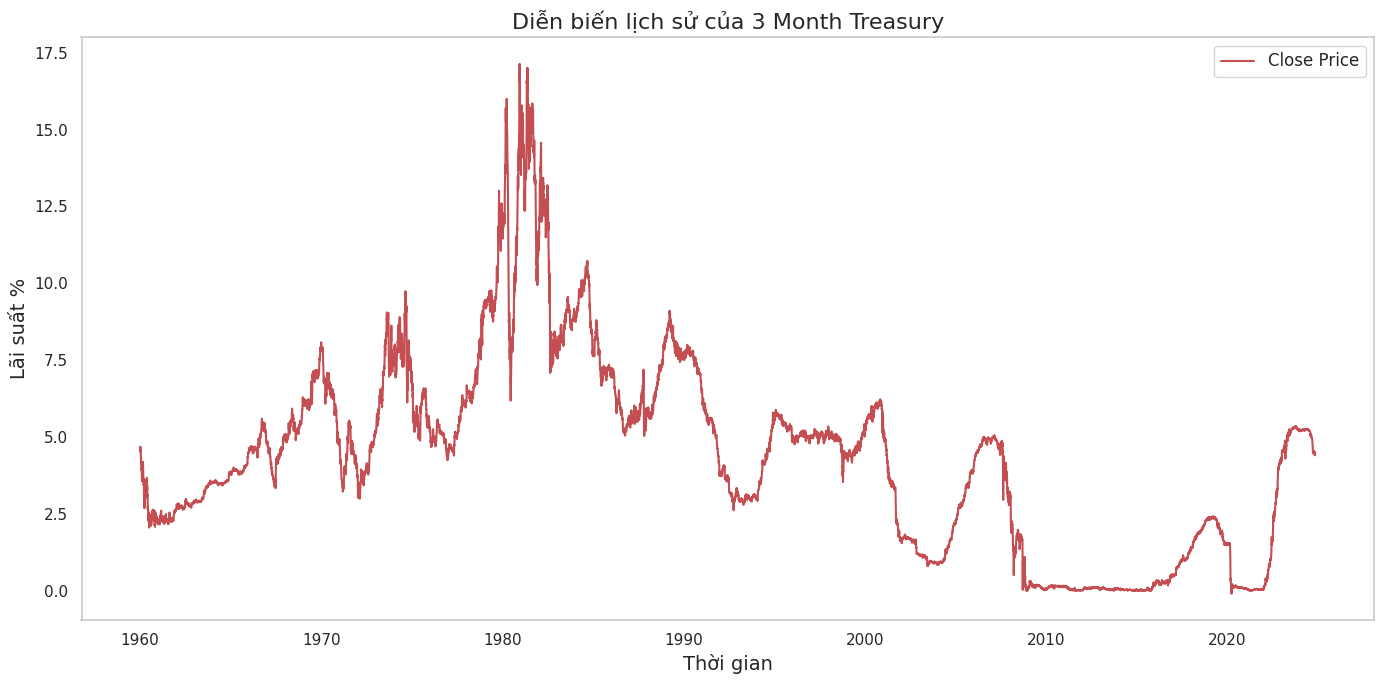

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define color palette for better distinction
colors = sns.color_palette("deep")

# List of CSV files
files = [
    "clean_VNINDEX.csv",
    "clean_VN100.csv",
    "clean_VN30.csv",
    "clean_HNX30.csv",
    "BTCUSD.csv",
    "ETHUSD.csv",
    "Gold.csv",
    "Silver.csv",
    "BrentCrudeOil.csv",
    "CrudeOil.csv",
    "30YearTreasury.csv",
    "10YearTreasury.csv",
    "5YearTreasury.csv",
    "3MonthTreasury.csv",
]

# Description dictionary for plot titles
description = {
    "clean_VNINDEX.csv": "VNINDEX",
    "clean_VN100.csv": "VN100",
    "clean_VN30.csv": "VN30",
    "clean_HNX30.csv": "HNX30",
    "BTCUSD.csv": "Bitcoin",
    "ETHUSD.csv": "Ethereum",
    "Gold.csv": "Gold",
    "Silver.csv": "Silver",
    "BrentCrudeOil.csv": "Brent Crude Oil",
    "CrudeOil.csv": "Crude Oil",
    "30YearTreasury.csv": "30 Year Treasury",
    "10YearTreasury.csv": "10 Year Treasury",
    "5YearTreasury.csv": "5 Year Treasury",
    "3MonthTreasury.csv": "3 Month Treasury",
}

# Set default plot style for clarity
sns.set(style="whitegrid")


# Function to generate time series plots
def plot_time_series(file, color):
    # Read data from CSV
    df = pd.read_csv(file)

    # Handle date column if present
    if "Date" in df.columns:
        df["Date"] = pd.to_datetime(df["Date"])

    # Create plot with improved formatting
    plt.figure(figsize=(14, 7))  # Adjust figure size for better readability
    # An cac truc
    # plt.gca().spines["top"].set_visible(False)
    # plt.gca().spines["right"].set_visible(False)
    # plt.gca().spines["left"].set_visible(False)
    # plt.gca().spines["bottom"].set_visible(False)
    plt.plot(df["Date"], df["Close"], label="Close Price", color=color)
    plt.title(f"Diễn biến lịch sử của {description[file]}", fontsize=16)  # Increase title font size
    plt.xlabel("Thời gian", fontsize=14)  # Increase label font size

    if file in ["BTCUSD.csv", "ETHUSD.csv"]:
        plt.ylabel("USD", fontsize=14)
    elif file in ["Gold.csv", "Silver.csv"]:
        plt.ylabel("USD/ounce", fontsize=14)
    elif file in ["BrentCrudeOil.csv", "CrudeOil.csv"]:
        plt.ylabel("USD/thùng", fontsize=14)
    elif file in ["30YearTreasury.csv", "10YearTreasury.csv", "5YearTreasury.csv", "3MonthTreasury.csv"]:
        plt.ylabel("Lãi suất %", fontsize=14)
    elif file in ["clean_VNINDEX.csv", "clean_VN100.csv", "clean_VN30.csv", "clean_HNX30.csv"]:
        plt.ylabel("Điểm", fontsize=14)

    plt.legend(fontsize=12)  # Maintain consistent font size
    plt.xticks(rotation=0)  # Rotate x-axis labels for readability on dense plots
    # plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # Add subtle gridlines
    plt.grid(False)
    plt.tight_layout()
    plt.savefig(f"../figs/single/{description[file]}.png")  # Save plot as PNG file
    # plt.show()

# Generate plots with color cycling
for i, file in enumerate(files):
    plot_time_series(file, colors[i % len(colors)])  # Use color palette cyclically

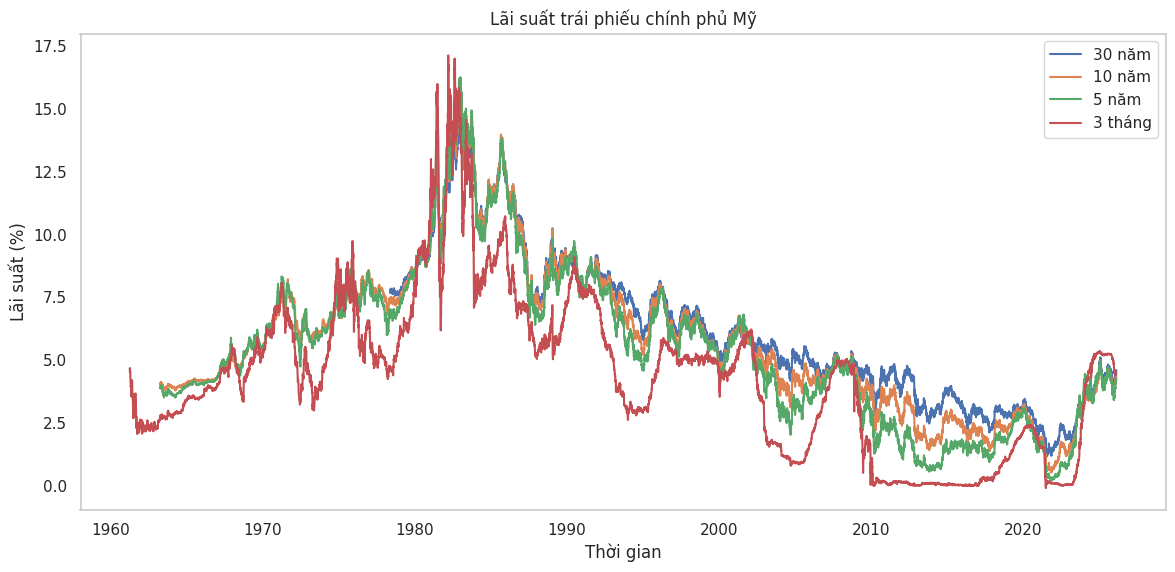

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ các file CSV
df_30y = pd.read_csv('30YearTreasury.csv', index_col='Date', parse_dates=True)
df_10y = pd.read_csv('10YearTreasury.csv', index_col='Date', parse_dates=True)
df_5y = pd.read_csv('5YearTreasury.csv', index_col='Date', parse_dates=True)
df_3m = pd.read_csv('3MonthTreasury.csv', index_col='Date', parse_dates=True)

# Kết hợp dữ liệu vào một DataFrame
df = pd.concat([df_30y['Close'], df_10y['Close'], df_5y['Close'], df_3m['Close']], axis=1)
df.columns = ['30 năm', '10 năm', '5 năm', '3 tháng']

# Vẽ biểu đồ đường
df.plot(figsize=(14, 7), title='Lãi suất trái phiếu chính phủ Mỹ', xlabel='Thời gian', ylabel='Lãi suất (%)')
plt.title('Lãi suất trái phiếu chính phủ Mỹ')
plt.xlabel('Thời gian')
plt.ylabel('Lãi suất (%)')
plt.legend()
plt.grid(False)
plt.xticks(rotation=0)
plt.savefig('../figs/combine/4_treasury_yield.png')
plt.show()

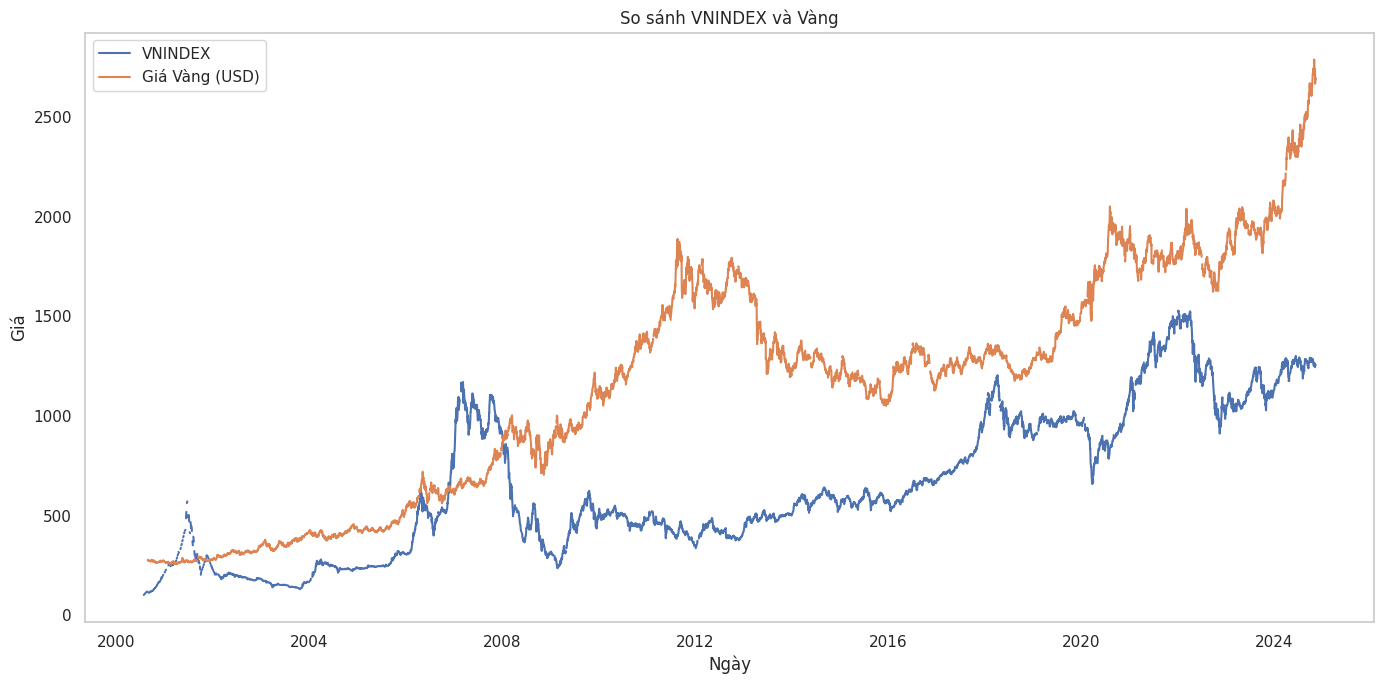

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ các file CSV
df1 = pd.read_csv('clean_VNINDEX.csv', index_col='Date', parse_dates=True)
df2 = pd.read_csv('Gold.csv', index_col='Date', parse_dates=True)

# Kết hợp dữ liệu vào một DataFrame
df = pd.concat([df1['Close'], df2['Close']], axis=1)
df.columns = ['VNINDEX', 'Gold']  # Assuming 'Close' exists in both DataFrames

# Vẽ biểu đồ đường - Specify columns
plt.figure(figsize=(14, 7))
plt.plot(df['VNINDEX'], label='VNINDEX')
plt.plot(df['Gold'], label='Giá Vàng (USD)')  # Specify currency unit

# Tùy chỉnh biểu đồ
plt.title('So sánh VNINDEX và Vàng')
plt.xlabel('Ngày')
plt.ylabel('Giá')
plt.grid(False)
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.savefig('../figs/combine/VNINDEX_Gold.png')
plt.show()

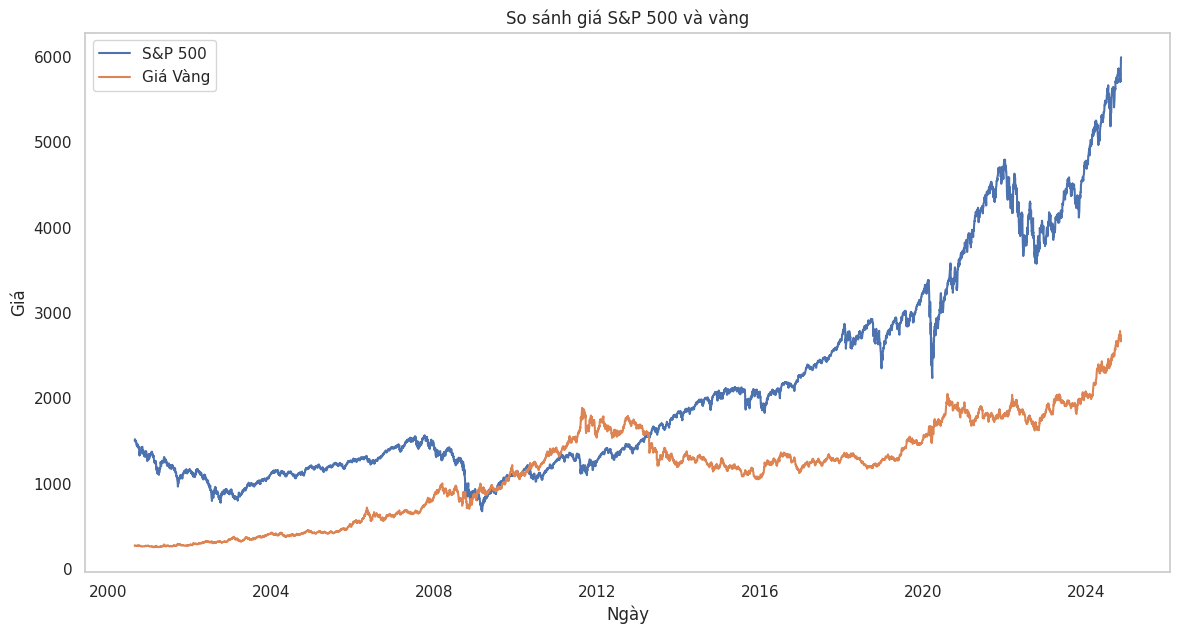

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV files
df1 = pd.read_csv('SP500.csv', index_col='Date', parse_dates=True)
df2 = pd.read_csv('Gold.csv', index_col='Date', parse_dates=True)

# Inner join data based on index
df = pd.merge(df1, df2, left_index=True, right_index=True, how='inner')

# Select closing price columns for plotting
sp500_price = df['Close_x']
gold_price = df['Close_y']

# Vẽ biểu đồ đường chỉ cho các cột Volume
plt.figure(figsize=(14, 7))
plt.plot(df['Close_x'], label='S&P 500')
plt.plot(df['Close_y'], label='Giá Vàng')

# Tùy chỉnh biểu đồ
plt.title('So sánh giá S&P 500 và vàng')
plt.xlabel('Ngày')
plt.ylabel('Giá')
plt.grid(True)
plt.xticks(rotation=0)
plt.legend()
plt.grid(False)
plt.savefig('../figs/combine/SP500_Gold.png')
plt.show()

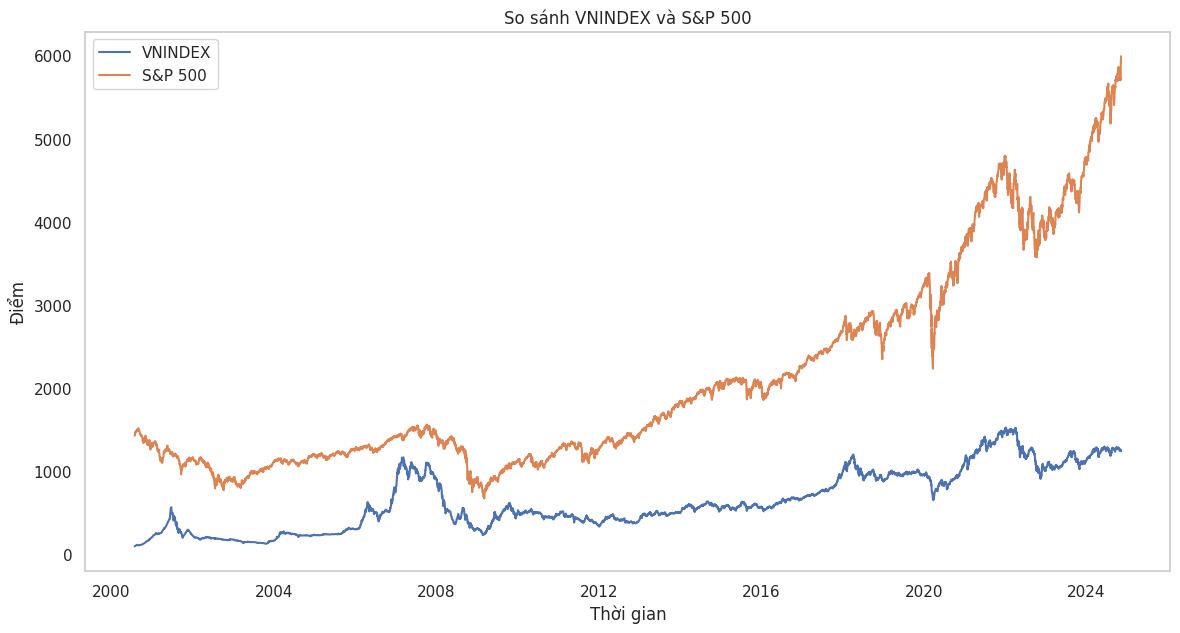

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ các file CSV
df1 = pd.read_csv('clean_VNINDEX.csv', index_col='Date', parse_dates=True)
df2 = pd.read_csv('SP500.csv', index_col='Date', parse_dates=True)

# Kết hợp dữ liệu dựa trên index (inner join)
df = pd.merge(df1, df2, left_index=True, right_index=True, how='inner')

# Vẽ biểu đồ đường chỉ cho các cột Volume
plt.figure(figsize=(14, 7))
plt.plot(df['Close_x'], label='VNINDEX')
plt.plot(df['Close_y'], label='S&P 500')

# Tùy chỉnh biểu đồ
plt.title('So sánh VNINDEX và S&P 500')
plt.xlabel('Thời gian')
plt.ylabel('Điểm')
plt.grid(False)
plt.xticks(rotation=0)
plt.legend()
plt.savefig('../figs/combine/VNINDEX_SP500_join2.png')
plt.show()

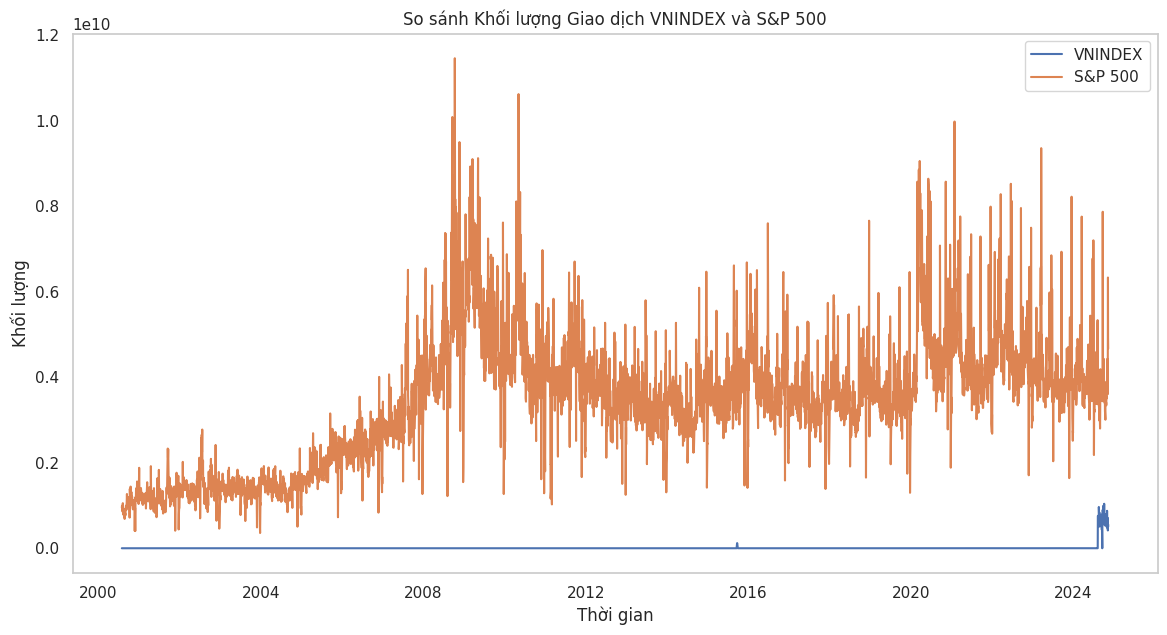

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ các file CSV
df1 = pd.read_csv('clean_VNINDEX.csv', index_col='Date', parse_dates=True)
df2 = pd.read_csv('SP500.csv', index_col='Date', parse_dates=True)

# Kết hợp dữ liệu dựa trên index (inner join)
df = pd.merge(df1, df2, left_index=True, right_index=True, how='inner')

# Vẽ biểu đồ đường chỉ cho các cột Volume
plt.figure(figsize=(14, 7))
plt.plot(df['Volume_x'], label='VNINDEX')
plt.plot(df['Volume_y'], label='S&P 500')

# Tùy chỉnh biểu đồ
plt.title('So sánh Khối lượng Giao dịch VNINDEX và S&P 500')
plt.xlabel('Thời gian')
plt.ylabel('Khối lượng')
plt.grid(False)
plt.xticks(rotation=0)
plt.legend()
plt.savefig('../figs/combine/VNINDEX_SP500_join2.png')
plt.show()

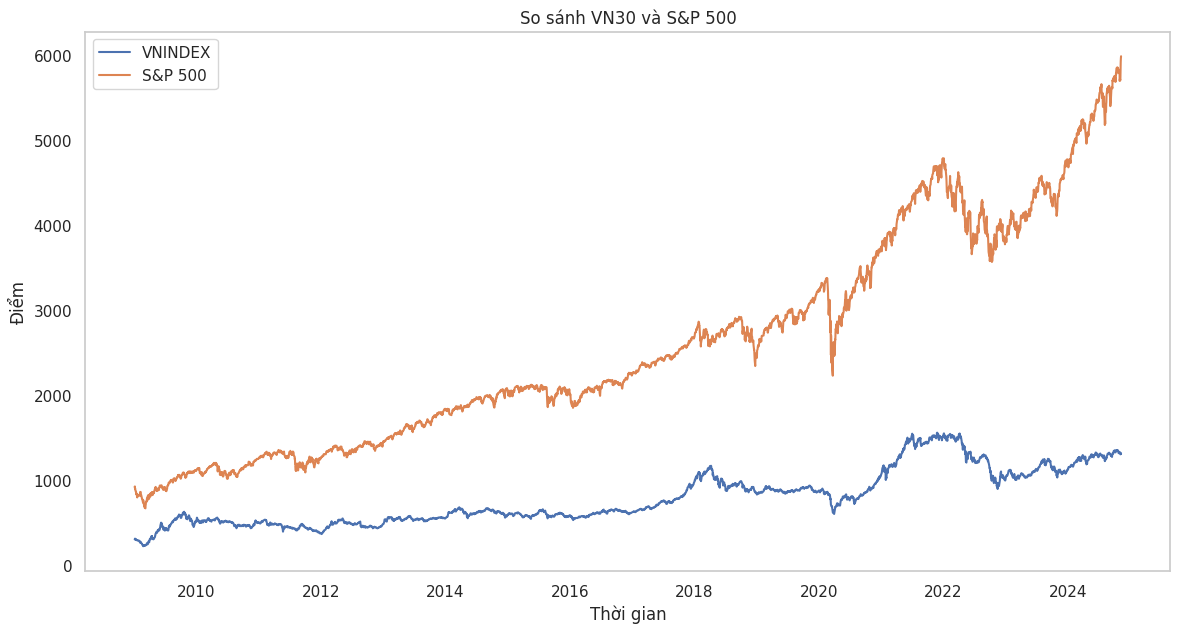

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ các file CSV
df1 = pd.read_csv('clean_VN30.csv', index_col='Date', parse_dates=True)
df2 = pd.read_csv('SP500.csv', index_col='Date', parse_dates=True)

# Kết hợp dữ liệu dựa trên index (inner join)
df = pd.merge(df1, df2, left_index=True, right_index=True, how='inner')

# Vẽ biểu đồ đường chỉ cho các cột Volume
plt.figure(figsize=(14, 7))
plt.plot(df['Close_x'], label='VNINDEX')
plt.plot(df['Close_y'], label='S&P 500')

# Tùy chỉnh biểu đồ
plt.title('So sánh VN30 và S&P 500')
plt.xlabel('Thời gian')
plt.ylabel('Điểm')
plt.grid(False)
plt.xticks(rotation=0)
plt.legend()
plt.savefig('../figs/combine/VN30_SP500.png')
plt.show()

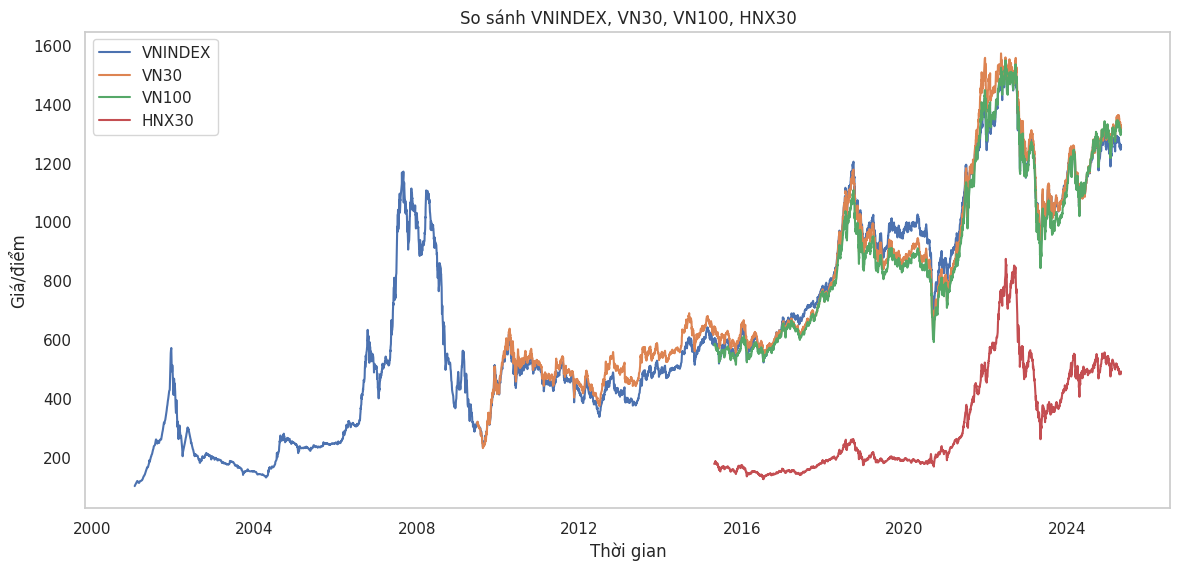

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ các file CSV
df1 = pd.read_csv('clean_VNINDEX.csv', index_col='Date', parse_dates=True)
df2 = pd.read_csv('clean_VN30.csv', index_col='Date', parse_dates=True)
df3 = pd.read_csv('clean_VN100.csv', index_col='Date', parse_dates=True)
df4 = pd.read_csv('clean_HNX30.csv', index_col='Date', parse_dates=True)


# Kết hợp dữ liệu vào một DataFrame
df = pd.concat([df1['Close'], df2['Close'], df3['Close'], df4['Close']], axis=1)
df.columns = ['VNINDEX', 'VN30', 'VN100', 'HNX30']

# Vẽ biểu đồ đường
df.plot(figsize=(14, 7))
plt.title('So sánh VNINDEX, VN30, VN100, HNX30')
# An cac luoi
plt.grid(False)
plt.xlabel('Thời gian')
plt.ylabel('Giá/điểm')
plt.xticks(rotation=0)
plt.legend()
plt.savefig('../figs/combine/VNINDEX_VN30_VN100_HNX30.png')
plt.show()

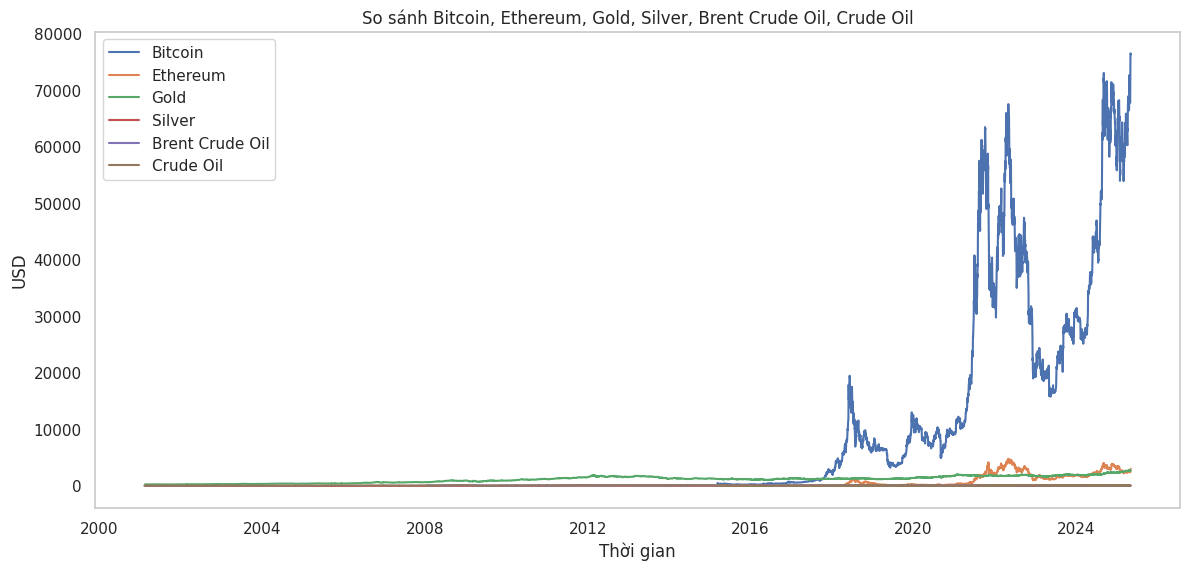

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ các file CSV
# So sanh Bitcoin, Ethereum, Gold, Silver, Brent Crude Oil, Crude Oil
df1 = pd.read_csv('BTCUSD.csv', index_col='Date', parse_dates=True)
df2 = pd.read_csv('ETHUSD.csv', index_col='Date', parse_dates=True)
df3 = pd.read_csv('Gold.csv', index_col='Date', parse_dates=True)
df4 = pd.read_csv('Silver.csv', index_col='Date', parse_dates=True)
df5 = pd.read_csv('BrentCrudeOil.csv', index_col='Date', parse_dates=True)
df6 = pd.read_csv('CrudeOil.csv', index_col='Date', parse_dates=True)

# Kết hợp dữ liệu vào một DataFrame
df = pd.concat([df1['Close'], df2['Close'], df3['Close'], df4['Close'], df5['Close'], df6['Close']], axis=1)
df.columns = ['Bitcoin', 'Ethereum', 'Gold', 'Silver', 'Brent Crude Oil', 'Crude Oil']

# Vẽ biểu đồ đường
df.plot(figsize=(14, 7))
plt.title('So sánh Bitcoin, Ethereum, Gold, Silver, Brent Crude Oil, Crude Oil')
plt.xlabel('Thời gian')
plt.ylabel('USD')
plt.grid(False)
plt.xticks(rotation=0)
plt.legend()
plt.savefig('../figs/combine/6_assets.png')
plt.show()

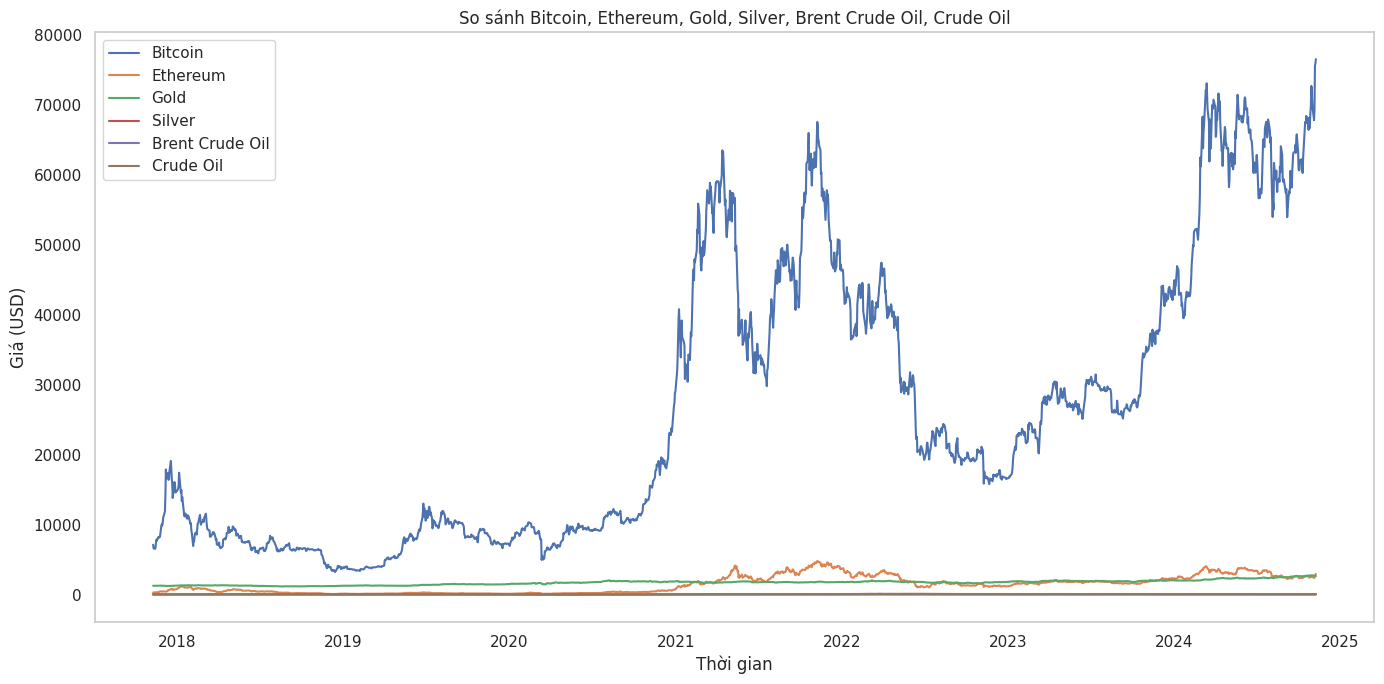

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ các file CSV
# So sanh Bitcoin, Ethereum, Gold, Silver, Brent Crude Oil, Crude Oil
df1 = pd.read_csv('BTCUSD.csv', index_col='Date', parse_dates=True)
df2 = pd.read_csv('ETHUSD.csv', index_col='Date', parse_dates=True)
df3 = pd.read_csv('Gold.csv', index_col='Date', parse_dates=True)
df4 = pd.read_csv('Silver.csv', index_col='Date', parse_dates=True)
df5 = pd.read_csv('BrentCrudeOil.csv', index_col='Date', parse_dates=True)
df6 = pd.read_csv('CrudeOil.csv', index_col='Date', parse_dates=True)

# Kết hợp dữ liệu vào một DataFrame
df = pd.concat([df1['Close'], df2['Close'], df3['Close'], df4['Close'], df5['Close'], df6['Close']], axis=1)
df.columns = ['Bitcoin', 'Ethereum', 'Gold', 'Silver', 'Brent Crude Oil', 'Crude Oil']

# Chọn những bản ghi mà tất cả các chỉ số đều same date (Inner Join)
df = df.dropna(subset=['Bitcoin', 'Ethereum', 'Gold', 'Silver', 'Brent Crude Oil', 'Crude Oil'])  # Inner Join

# Vẽ biểu đồ đường
plt.figure(figsize=(14, 7))
plt.plot(df['Bitcoin'], label='Bitcoin')
plt.plot(df['Ethereum'], label='Ethereum')
plt.plot(df['Gold'], label='Gold')
plt.plot(df['Silver'], label='Silver')
plt.plot(df['Brent Crude Oil'], label='Brent Crude Oil')
plt.plot(df['Crude Oil'], label='Crude Oil')

# Tùy chỉnh biểu đồ
# plt.title('So sánh Bitcoin, Ethereum, Vàng, Bạc, Dầu Brent, Dầu thô')  # Use Vietnamese names
plt.title('So sánh Bitcoin, Ethereum, Gold, Silver, Brent Crude Oil, Crude Oil')
plt.xlabel('Thời gian')
plt.ylabel('Giá (USD)')
plt.grid(False)
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.savefig('../figs/combine/6_assets_1.png')
plt.show()